### How to filter particular word?

In [3]:
import re 

out = '''firmware-version : x.x.x.x
         Serial-number : 4947463783
         Old-firmware-version : x.x.x.x
         '''
[i for i in out.splitlines() if re.findall(r'\d{1,}',i)]

['         Serial-number : 4947463783']

In [4]:
import re 

out = '''firmware-version : x.x.x.x
         Serial-number : 4947463783
         Old-firmware-version : x.x.x.x
         '''
[re.sub(r'S.*:','',i) for i in out.splitlines() if re.findall(r'\d{1,}',i)]

['          4947463783']

In [8]:
import re 

out = '''firmware-version : x.x.x.x
         Serial-number : 4947463783
         Old-firmware-version : x.x.x.x
         '''
[i for i in out.splitlines() if re.findall(r'^firmware-version',i)]

['firmware-version : x.x.x.x']

### How to format the output using zip and iter method?
Create table format.

In [1]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for i,j,k in zip(*[iter(lst)] *3):
    print('{:4} {:4} {:4}'.format(i, j, k))

   1    2    3
   4    5    6
   7    8    9


### How to split a character from string?

In [3]:
%%bash

text='Linux'
echo $text | grep -o '.'

L
i
n
u
x


In [9]:
%%python3

text='Linux'
print(list(text))

['L', 'i', 'n', 'u', 'x']


In [7]:
%%python3

import re

text='Linux'
print(re.findall(r'.',text))

['L', 'i', 'n', 'u', 'x']


### How to convert text file from csv file?

In [27]:
from pathlib import Path

f = Path('/home/mana/Work/user.csv').read_text().splitlines()
fr = [i.replace(',',' ') for i in f]
print(*fr, sep = '\n', file = open('/home/mana/Work/user.txt','w'))

### How to remove empty lines in a file?

In [45]:
!cat /home/mana/Work/user.txt

daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin

bin x 2 2 bin /bin /usr/sbin/nologin
sys x 3 3 sys /dev /usr/sbin/nologin
sync x 4 65534 sync /bin /bin/sync


In [ ]:
%%bash

sed '/^$/d' /home/mana/Work/user.txt

In [2]:
%%python3

from pathlib import Path

f = Path('/home/mana/Work/user.txt').read_text().splitlines()
lr = [i for i in f if i]
print(*lr, sep = '\n', file = open('/home/mana/Work/user1.txt','w'))

In [47]:
!cat /home/mana/Work/user1.txt

daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin
bin x 2 2 bin /bin /usr/sbin/nologin
sys x 3 3 sys /dev /usr/sbin/nologin
sync x 4 65534 sync /bin /bin/sync


### How can I get the days_since_birth return to weeks and days?

In [97]:
from datetime import datetime, timedelta

date_of_birth = datetime(1987, 11, 4)
current_date = datetime.now()
da = (current_date - date_of_birth).days
print(da//7,'weeks',da%7,'days.')

1675 weeks 1 days.


### How to remove duplicate lines in a file?

In [28]:
!cat /home/mana/Work/dup.txt

Apples and pears.
Citrus – oranges, grapefruits, mandarins and limes.
Stone fruit – nectarines, apricots, peaches and plums.
Tropical and exotic – bananas and mangoes.
Apples and pears.
Stone fruit – nectarines, apricots, peaches and plums.


In [31]:
from collections import Counter
from pathlib import Path

p = Path('/home/mana/Work/dup.txt').read_text().splitlines()
u = [i for i in Counter(p)]
u
print(*u, sep = '\n', file = open('/home/mana/Work/new.txt', 'w'))

In [32]:
!cat /home/mana/Work/new.txt

Apples and pears.
Citrus – oranges, grapefruits, mandarins and limes.
Stone fruit – nectarines, apricots, peaches and plums.
Tropical and exotic – bananas and mangoes.


### How to find that which RAID configure in server?

In [16]:
from pathlib import Path

Path('/proc/mdstat').read_text().splitlines()[1].split()[3]

'raid5'

In [7]:
%%python3

from pathlib import Path
import re

P = Path('/proc/mdstat').read_text().splitlines()
[i.split()[3] for i in P if re.search(r'active',i)]

['raid5']

### How to fetch particular line in a file?

In [17]:
!cat /home/mana/Work/line.txt

This is line number 1
This is line number 2
This is line number 3
This is line number 4
This is line number 5


In [23]:
%%python3

from pathlib import Path

print(Path('/home/mana/Work/line.txt').read_text().splitlines()[2])

This is line number 3


In [19]:
%%bash

awk 'NR == 3' /home/mana/Work/line.txt

This is line number 3


In [20]:
%%bash

sed -n '3p' /home/mana/Work/line.txt

This is line number 3


In [1]:
table = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}
seq=input('enter DNA string: ')
protein =""
if len(seq)%3 == 0:
    for i in range(0, len(seq), 3):
        codon = seq[i:i + 3]
        protein+= table[codon]            
        #return protein
print(protein)

enter DNA string: TGGTACTCTTTCTTCACAAGGGCGCCGTGTGTG
WYSFFTRAPCV


### Translator from DNA to Protein

In [58]:
import re

table = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}
DNA_string = 'TGGTACTCTTTCTTCACAAGGGCGCCGTGTGTG'

''.join([table[i] for i in re.findall(r'...',DNA_string)])

'WYSFFTRAPCV'

In [37]:
l=[('girls','4'),('boys','5'),('girls','10')]
age = {}
for x,y in l:
    age.setdefault(x,[]).append(int(y))
[{j:sum(age[j])} for j in age]

[{'girls': 14}, {'boys': 5}]

### How to fetch .txt files only?

In [56]:
!ls -1 /home/mana/Work/*.txt

/home/mana/Work/dup.txt
/home/mana/Work/fruit1.txt
/home/mana/Work/fruit2.txt
/home/mana/Work/line.txt
/home/mana/Work/new.txt
/home/mana/Work/user1.txt
/home/mana/Work/user.txt


In [54]:
from pathlib import Path

[*Path('/home/mana/Work').glob('*.txt')]

[PosixPath('/home/mana/Work/fruit1.txt'),
 PosixPath('/home/mana/Work/fruit2.txt'),
 PosixPath('/home/mana/Work/user.txt'),
 PosixPath('/home/mana/Work/user1.txt'),
 PosixPath('/home/mana/Work/dup.txt'),
 PosixPath('/home/mana/Work/new.txt'),
 PosixPath('/home/mana/Work/line.txt')]

### How to print output in beautiful table format?

In [3]:
%%bash

len=$(echo -e 'one Two Three\n1 2 3\n4 5 6' | sed 's/ /,|,/g' \
| column -s ',' -t | awk 'NR == 1 {print length}')

echo -e 'one Two Three\n1 2 3\n4 5 6\n7 8 9' | sed 's/ /,|,/g' | \
column -s ',' -t | sed "1 a $(printf "%${len}s\n" | tr " " "=")"

one  |  Two  |  Three
1    |  2    |  3
4    |  5    |  6
7    |  8    |  9


### How to open image file?

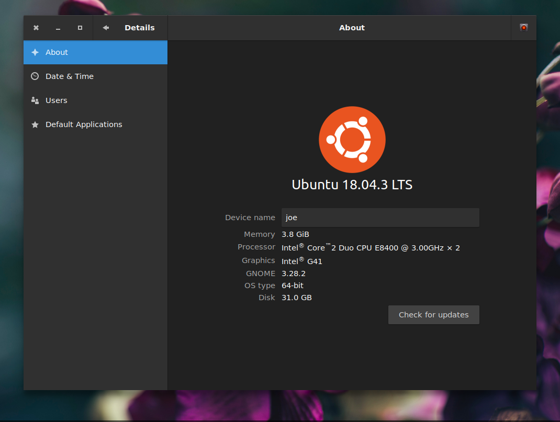

In [29]:
from PIL import Image

Image.open('/home/mana/Work/ubuntu.png')

### How to open textfile?

In [35]:
%%bash

cat /home/mana/Work/fruit2.txt

Apples and pears.
Citrus – oranges, grapefruits, mandarins and limes.
Stone fruit – nectarines, apricots, peaches and plums.
Tropical and exotic – bananas and
Berries – strawberries, blueberries, kiwifruit and passionfruit.



In [36]:
%%python3

from pathlib import Path

opn = Path('/home/mana/Work/fruit2.txt').read_text().splitlines()
print(*opn,sep = '\n')

Apples and pears.
Citrus – oranges, grapefruits, mandarins and limes.
Stone fruit – nectarines, apricots, peaches and plums.
Tropical and exotic – bananas and
Berries – strawberries, blueberries, kiwifruit and passionfruit.



### Get number closest to a given value

In [126]:
num = [0, 10, 20, 30]
min(num, key=lambda x:abs(x-22))


20

In [123]:
dica={0:[10],1:[20],2:[30]}
dic = sum(dica.values(),[])
min(dic, key=lambda x:abs(x-26))

30

In [16]:
dica={0:[10],1:[20],2:[30]}
lista=[16,11,24,25]
dic = sum(dica.values(),[])

def fn(*args):
    for i in args:
        for x,y in dica.items():
            v = min(dic, key=lambda x:abs(x-i-1))
            r = dica[x]
            if r[0] == v:
                dica.setdefault(x,[]).append(i)
fn(*lista)
dica

{0: [10, 11], 1: [20, 16, 24], 2: [30, 25]}

In [17]:
dica={0:[10,15],1:[20],2:[30]}
lista=[16,11,24,25]
temp_dict = {v[0]:k for k,v in dica.items()}
for num in lista:
    dica[temp_dict[min(temp_dict, key=lambda x:abs(x-num-1))]].append(num)
print(dica)

{0: [10, 15, 11], 1: [20, 16, 24], 2: [30, 25]}


In [27]:
lista=[16,11,24,25]
dica={0:[10,12],1:[20],2:[30]}
k=[dica[k][0] for k in dica]
fa=lambda num: [abs(x-num-1) for x in k]
fb=lambda z: z.index(min(z))
for num in lista: dica[fb(fa(num))].append(num)
print(dica)

{0: [10, 12, 11], 1: [20, 16, 24], 2: [30, 25]}


### How to fetch range of lines?

In [9]:
!cat /home/mana/Work/line.txt

This is line number 1
This is line number 2
This is line number 3
This is line number 4
This is line number 5
This is line number 6
This is line number 7


In [11]:
%%bash 

sed -n '3,5p' /home/mana/Work/line.txt

This is line number 3
This is line number 4
This is line number 5


In [12]:
%%python3

from pathlib import Path

print(*Path('/home/mana/Work/line.txt').read_text().splitlines()[2:5],
     sep = '\n')

This is line number 3
This is line number 4
This is line number 5


In [13]:
!cat /home/mana/Work/user.csv

daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
bin,x,2,2,bin,/bin,/usr/sbin/nologin
sys,x,3,3,sys,/dev,/usr/sbin/nologin
sync,x,4,65534,sync,/bin,/bin/sync


In [44]:
from pathlib import Path

lines = Path('/home/mana/Work/user.csv').read_text().splitlines()


In [45]:
!cat /home/mana/Work/user_out.csv

daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
bin,x,2,2,bin,/bin,/usr/sbin/nologin
smd,x,3,3,smd,/dev,/usr/sbin/nologin
sync,x,4,65534,sync,/bin,/bin/sync


### Ranges

In [61]:
%%bash
for i in {1..3}; do
    echo "Welcome $i"
done

Welcome 1
Welcome 2
Welcome 3


In [60]:
%%python3
for i in range(1,4):
    print('Welcome',i)

Welcome 1
Welcome 2
Welcome 3


In [49]:
%%bash
for i in {5..15..5}; do
    echo "Welcome $i"
done

Welcome 5
Welcome 10
Welcome 15


In [58]:
%%python3
for i in range(5,20,5):
    print('Welcome',i)

Welcome 5
Welcome 10
Welcome 15


### How to find Mother Board name?

In [1]:
from pathlib import Path
import re

path = Path('/sys/class/dmi/id')
boa = [bd for bd in path.iterdir() if re.search(r'board_(ven|nam)',str(bd))]
board = [rb.read_text().strip() for rb in boa]
print(*board)

 G41 Series


### What is output of this Program?

In [ ]:
[chr(j) for j in range(65,69)]

### How to check whether file or Directory?

In [23]:
%%bash

for i in $(ls -1 /home/mana/Pictures); do
if [ -d /home/mana/Pictures/$i ]; then
echo "$i is a Directory."
else
echo "$i is a File."
fi
done

tintin.png is a File.
Wallpapers is a Directory.


In [26]:
%%python3

from pathlib import Path

P = Path('/home/mana/Pictures')
for i in P.iterdir():
    if i.is_dir():
        print(i.name,'is a Directory.')
    else:
         print(i.name,'is a File.')

Wallpapers is a Directory.
tintin.png is a File.


### How to read particular colum in csv file?

In [27]:
!cat /home/mana/Work/user.csv

daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
bin,x,2,2,bin,/bin,/usr/sbin/nologin
sys,x,3,3,sys,/dev,/usr/sbin/nologin
sync,x,4,65534,sync,/bin,/bin/sync


In [32]:
from pathlib import Path

Pa = Path('/home/mana/Work/user.csv').read_text().splitlines()
print(*[i.split(',')[4] for i in Pa ], sep = '\n')

daemon
bin
sys
sync


### How to split list of lists of words into the list of list of characters?


In [4]:
list_of_l= [['ototot'], ['tototo'], ['ttoott'], ['ottott']]
[list(i[0]) for i in list_of_l]

[['o', 't', 'o', 't', 'o', 't'],
 ['t', 'o', 't', 'o', 't', 'o'],
 ['t', 't', 'o', 'o', 't', 't'],
 ['o', 't', 't', 'o', 't', 't']]

### How to generate Secure password?

In [44]:
from string import ascii_letters,digits
from random import choices
import re

c = ascii_letters+digits+'#$%&*+-@*?:'
passwds = [''.join(choices(c,k=8)) for i in range(10)]
rgx = ['\W', '[a-z]', '[A-Z]', '\d']
for i in passwds:
    x = len([*filter(lambda x: re.search(r''+x+'',i), rgx)])
    if x == 4:
        print('Your Secure Password: ',i)
        break

Your Secure Password:  ufagSb#5


### How to get this output?

'S1000E1'

In [40]:
st = 'S-1000-1E'
s = st.split('-')
s1,s2 = s[:2],s[2]
''.join(sum((s1,[s2[::-1]]),[]))

'S1000E1'

### How to calculate Linux Server Uptime using Python?

In [36]:
!uptime -p

up 3 days, 18 hours, 14 minutes


In [37]:
from pathlib import Path as Pa
from datetime import timedelta

u = Pa('/proc/uptime').read_text().split()[0]
t = timedelta(seconds = float(u))
print(str(t).rpartition(':')[0])

3 days, 18:14


### How to alter Forward and Reverse  the string?

In [13]:
st = 'Python'
fdir = [st[0:i] for i in range(len(st)+1)]
print(*(fdir+fdir[::-1]), sep = '\n')


P
Py
Pyt
Pyth
Pytho
Python
Python
Pytho
Pyth
Pyt
Py
P



### How to fetch ip address only from /etc/hosts file?

In [14]:
%%bash

awk '!/#/ && !/^$/{print $1}' /etc/hosts

127.0.0.1
127.0.1.1
::1
fe00::0
ff00::0
ff02::1
ff02::2


In [21]:
%%python3

from pathlib import Path

file = Path('/etc/hosts').read_text().splitlines()
ip_filter = [ip.split()[0] for ip in file if '#' not in ip and ip]
print(*ip_filter, sep = '\n')

127.0.0.1
127.0.1.1
::1
fe00::0
ff00::0
ff02::1
ff02::2


### How to check website up or down?

In [28]:
%%bash

while read name
do 
echo -n "$name-->"
(curl -Is $name | grep -i "location" &> /dev/null) && echo "host Up" || echo "host down" 
done < /home/mana/Work/nodes.txt

google.com-->host Up
facebook.com-->host Up
twitter.com-->host Up
tamilrockers.ca-->host down


### How to put line number in front of each line?

In [33]:
!cat /home/mana/Work/dup.txt

Apples and pears.
Citrus – oranges, grapefruits, mandarins and limes.
Stone fruit – nectarines, apricots, peaches and plums.
Tropical and exotic – bananas and mangoes.


In [34]:
%%bash

cat -n /home/mana/Work/dup.txt

     1	Apples and pears.
     2	Citrus – oranges, grapefruits, mandarins and limes.
     3	Stone fruit – nectarines, apricots, peaches and plums.
     4	Tropical and exotic – bananas and mangoes.


In [35]:
%%python3

from pathlib import Path

file = Path('/home/mana/Work/dup.txt').read_text().splitlines()
for x,y in enumerate(file,1):
    print(x, y)

1 Apples and pears.
2 Citrus – oranges, grapefruits, mandarins and limes.
3 Stone fruit – nectarines, apricots, peaches and plums.
4 Tropical and exotic – bananas and mangoes.


### How to remove special characters from string?

In [81]:
%%bash

echo 'P*&y_t-*h$%o@n+' | grep -o  '[a-zA-Z]' | tr -d '\n'

Python

In [107]:
%%python3

import re

mystring = 'P*&y_t-*h$%o@n+'
print(''.join(re.findall(r'[a-zA-Z]',mystring)))

Python


In [76]:
%%python3
#Method: 1
import re

mystring = 'P*&y_t-*h$%o@n+'
letters = [i for i in mystring if re.match(r'[a-zA-Z]',i)]
print(''.join(letters))

Python


In [75]:
%%python3
#Method: 2
from string import punctuation

mystring = 'P*&y_t-*h$%o@n+'
letters = [i for i in mystring if i not in punctuation]
print(''.join(letters))

Python


### How to check if two indexes have any common values?

In [103]:
from collections import Counter
idx = [5, 'u', '8', 9, 's', 187, 'v','u', 890]
for x,y in Counter(idx).items():
    if y > 1:
        print(repr(x), 'have common values into two indexs.')

'u' have common values into two indexs.


In [1]:
!cat /home/mana/Work/user.txt

daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin

bin x 2 2 bin /bin /usr/sbin/nologin 
sys x 3 3 sys /dev /usr/sbin/nologin 
sync x 4 65534 sync /bin /bin/sync 


In [2]:
from pathlib import Path

p = Path('/home/mana/Work/user.txt').read_text().splitlines()[:4]
p

['daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin',
 '',
 'bin x 2 2 bin /bin /usr/sbin/nologin ',
 'sys x 3 3 sys /dev /usr/sbin/nologin ']

In [4]:
from pathlib import Path

p = Path('/home/mana/Work/user.txt').read_text().splitlines()[:4]
print(*p, sep = '\n')

daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin

bin x 2 2 bin /bin /usr/sbin/nologin 
sys x 3 3 sys /dev /usr/sbin/nologin 


###  How to export a csv format to xlsx?

In [2]:
from pathlib import Path

P = Path('/home/mana/Work/user.csv').read_text().splitlines()
print(*P, sep = '\n', file = open('/home/mana/Work/user.xlsx','w'))

### Draw pattern 'V'

In [84]:
s = 'v'*16
ln = len(s)
space = ln - 2
lastpos = ln - 1
size = ln//2 if ln  % 2 == 0 else ln//2+1

for i in range(size):
    if i == lastpos:
        print(' '*i+s[i])
    else:
        print(' '*i+s[i]+' '*space+s[lastpos])
    lastpos -= 1
    space -= 2


v              v
 v            v
  v          v
   v        v
    v      v
     v    v
      v  v
       vv


In [89]:
if 'o':
    print('exist')
else:
    print('Dose not exist.')

exist


In [87]:
name = 'tersa'
if 'o' and 'r' in name:
    print('exist')
else:
    print('Dose not exist.')

exist


In [88]:
name = 'tersa'
if 'o' in name and 'r' in name:
    print('exist')
else:
    print('Dose not exist.')

Dose not exist.


### Happy Christmas 

In [39]:
for tree in range(1,23,2):
    print(('*'*tree).center(23))
for leg in range(3):
    print(('||').center(23))
print(('\====/').center(23))

           *           
          ***          
         *****         
        *******        
       *********       
      ***********      
     *************     
    ***************    
   *****************   
  *******************  
 ********************* 
           ||          
           ||          
           ||          
         \====/        


In [19]:
inp = int(input('Enter Your Cristmas tree size Number: '))
for i in range(1,inp,2):
    print(('*'*i).center(inp))
for sp in range(3):
    print(('||').center(inp))
print(('\====/').center(inp))

Enter Your Cristmas tree size Number: 33
                *                
               ***               
              *****              
             *******             
            *********            
           ***********           
          *************          
         ***************         
        *****************        
       *******************       
      *********************      
     ***********************     
    *************************    
   ***************************   
  *****************************  
 ******************************* 
                ||               
                ||               
                ||               
              \====/             


### Christmas Tree

In [13]:
import numpy as np

x = np.arange(7,16)
y = np.arange(1,18,2)
z = np.column_stack((x[::-1],y))
for i,j in z:
    print(' '*i+'*'*j)
for r in range(3):
    print(' '*13,'||')
print(' '*12, end = '\====/')
print('')

               *
              ***
             *****
            *******
           *********
          ***********
         *************
        ***************
       *****************
              ||
              ||
              ||
            \====/


In [18]:
b = 34
c = 0
while b > 0 and c < 33 :
        print('\33[1;32;48m'+' '*b+'*'+'*'*c+'\33[0m')
        b -= 1
        c += 2
for r in range(3):
    print(' '*33,'||')
print(' '*32, end = '\====/')
print('')

                                  *
                                 ***
                                *****
                               *******
                              *********
                             ***********
                            *************
                           ***************
                          *****************
                         *******************
                        *********************
                       ***********************
                      *************************
                     ***************************
                    *****************************
                   *******************************
                  *********************************
                                  ||
                                  ||
                                  ||
                                \====/


### How to draw christmas tree using Python?

This is very simplest code.

In [39]:
for tree in range(1,13,2):
    print(('*'*tree).center(23))


           *           
          ***          
         *****         
        *******        
       *********       
      ***********      


In [42]:
for leg in range(2):
    print('||'.center(23))

           ||          
           ||          


In [43]:
print('\====/'.center(23))

         \====/        


### Draw vertical line pattern

In [23]:
for i in range(1,20,2):
    print(i*'*'.center(20))

         *          
         *                   *                   *          
         *                   *                   *                   *                   *          
         *                   *                   *                   *                   *                   *                   *          
         *                   *                   *                   *                   *                   *                   *                   *                   *          
         *                   *                   *                   *                   *                   *                   *                   *                   *                   *                   *          
         *                   *                   *                   *                   *                   *                   *                   *                   *                   *                   *                   *                   *          
         *   

In [16]:
Input1 = [{'roll_no': ['123445', '1212'], 'school_id': 1}, 
          {'roll_no': ['HA-4848231'], 'school_id': 2}] 
  
Input2 = [{'roll_no': ['473427'], 'school_id': 2}, 
          {'roll_no': ['092112'], 'school_id': 5}] 
Input1+Input2

[{'roll_no': ['123445', '1212'], 'school_id': 1},
 {'roll_no': ['HA-4848231'], 'school_id': 2},
 {'roll_no': ['473427'], 'school_id': 2},
 {'roll_no': ['092112'], 'school_id': 5}]

### How to Simulate Linux tac command using python?

In [1]:
!cat /home/mana/Work/user.txt

daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin
bin x 2 2 bin /bin /usr/sbin/nologin 
sys x 3 3 sys /dev /usr/sbin/nologin 
sync x 4 65534 sync /bin /bin/sync 


In [2]:
!tac /home/mana/Work/user.txt

sync x 4 65534 sync /bin /bin/sync 
sys x 3 3 sys /dev /usr/sbin/nologin 
bin x 2 2 bin /bin /usr/sbin/nologin 
daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin


In [7]:
%%python3

from pathlib import Path

lines = Path('/home/mana/Work/user.txt').read_text().splitlines()[::-1]
print(*lines, sep = '\n')

sync x 4 65534 sync /bin /bin/sync 
sys x 3 3 sys /dev /usr/sbin/nologin 
bin x 2 2 bin /bin /usr/sbin/nologin 
daemon x 1 1 daemon /usr/sbin /usr/sbin/nologin


### How to compare two lines? If any word is difference then it should be focuse color.

In [12]:
from difflib import HtmlDiff

line1 = ['Chennai is very hot.']
line2 = ['Chennai is very sweet.']
print(HtmlDiff().make_file(line1,line2), file = open('/home/mana/Work/diff.html','w'))

### How to compare two files?

In [9]:
from difflib import HtmlDiff
from pathlib import Path

f1 = Path('/home/mana/Work/file1.txt').read_text().splitlines()
f2 = Path('/home/mana/Work/file2.txt').read_text().splitlines()
print(HtmlDiff().make_file(f1,f2), file = open('/home/mana/Work/diff.html','w'))

### Cowsay print in Python and Bash

In [55]:
print('^__^')
print('(oo)\\________')
print('(__)\\        )\\/\\')
print(' '*5+'||----w |')
print(' '*5+'||     ||')

^__^
(oo)\________
(__)\        )\/\
     ||----w |
     ||     ||


In [74]:
%%bash

cowsay foo

 _____
< foo >
 -----
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||


### How to draw COW in python?

In [73]:
print('^__^')
print('(oo)\\'+'_'*8)
print('(__)\\'+' '*8+')\\/\\')
print(' '*5+'||----w |')
print(' '*5+'||     ||')

^__^
(oo)\________
(__)\        )\/\
     ||----w |
     ||     ||


### Compare 2 columns and highlight same text.

In [116]:
!cat /home/mana/Work/risi.csv

My name is Rishi, name is


In [114]:
from  pathlib import Path

f1 = Path(r'/home/mana/Work/risi.csv').read_text().splitlines()
for i in f1:
    s = i.split(',')
    if len(s) == 2:
        com = set(s[0].split()) & set(s[1].split())
        print(s[0].replace(' '.join(com),'<span style="color: red">{}</span>'
                           .format(' '.join(com))), file = open('/home/mana/Work/diff.html','w'))
    else:
        pass
    

In [113]:
from  pathlib import Path

f1 = Path(r'/home/mana/Work/risi.csv').read_text().splitlines()
clt = []
for i in f1:
    s = i.split(',')
    if len(s) == 2:
        com = set(s[0].split()) & set(s[1].split())
        clt += [s[0].replace(' '.join(com),'<span style="color: red">{}</span>'.format(' '.join(com)))]
    else:
        pass
#print(*clt, sep = '\n', file = open('/home/mana/Work/diff.html','w'))
print('<HTML><body><p><br>{}</p></HTML></body>'.format(*clt), sep = '\n', file = open('/home/mana/Work/diff.html','w'))

### Merging two list of dictionaries

In [50]:
from collections import defaultdict 

Input1 = [{'roll_no': ['123445', '1212'], 'school_id': 1}, 
		{'roll_no': ['HA-4848231'], 'school_id': 2}] 

Input2 = [{'roll_no': ['473427'], 'school_id': 2}, 
		{'roll_no': ['092112'], 'school_id': 5}] 


temp = defaultdict(list) 

for elem in Input1 + Input2: 
    temp[elem['school_id']].extend(elem['roll_no']) 

Output = [{"roll_no":y, "school_id":x} for x, y in temp.items()] 

print(Output) 

[{'roll_no': ['123445', '1212'], 'school_id': 1}, {'roll_no': ['HA-4848231', '473427'], 'school_id': 2}, {'roll_no': ['092112'], 'school_id': 5}]


In [72]:
%%bash

echo {Manavalan,Joe}.micheal

Manavalan.micheal Joe.micheal


In [115]:
# This program is to check user exists or not in Linux System.
import pwd

def user_chk(user):
    try:
        pwd.getpwnam(user)[0] == user
    except KeyError:
        print('User {!r} not exists.'.format(user))
    else:
        print('User {!r} exists.'.format(user))
        

user_chk('mana')
user_chk('arul')

User 'mana' exists.
User 'arul' not exists.


### How to search a file recursively?

In [122]:
from pathlib import Path as Pa

f = Pa(input('Enter File Name: '))
d = Pa('/var')

for i in d.rglob('*'):
    if i.name.lower() == f.name.lower():
        if i.is_file():
            print(i)

Enter File Name: SYslog
/var/log/syslog
/var/log/installer/syslog


### Count occurrence of a letter in a word/name entered by a user

In [121]:
from collections import Counter

inp = input('Enter Name: ')
Counter(inp)

Enter Name: Manavalan


Counter({'M': 1, 'a': 4, 'n': 2, 'v': 1, 'l': 1})

### Check root user or not

In [15]:
%%bash


if (( $UID == 0 )); then
echo "Root User."
else
echo "User $USER Not Root User."
fi

User mana Not Root User.


In [16]:
%%python3

import os
import getpass

if os.getuid() == 0:
    print('Root User.')
else:
    print('User {} Not Root User.'.format(getpass.getuser()))

User mana Not Root User.


### Findout empty line

In [50]:
lines = '''Hi
This is line one

This line two

This is line three'''
{'The line '+str(i):'Empty line.' for i,j in enumerate(lines.splitlines(),1) if not j}

{'The line 3': 'Empty line.', 'The line 5': 'Empty line.'}

In [71]:
import re

lines = '''Hi
This is line one

This line two

This is line three'''
re.findall(r'\n\s*\n',lines)

['\n\n', '\n\n']

### Findout new line

In [67]:
import re

lines = '''Hi
This is line one

This line two

This is line three'''

[i for i in lines if re.match(r'^$',i)]

['\n', '\n', '\n', '\n', '\n']

### split text contains spaces but keeps words inside quotations as one unit

In [30]:
import re

s = 'cmd -a -b -c "file with spaces.mp4" -e -f'
re.findall('"[^"]*"|\S+', s)

['cmd', '-a', '-b', '-c', '"file with spaces.mp4"', '-e', '-f']

### Counts upper and lower cases in a sentence

In [42]:
sentence = 'Linux is good Operating system.'

def up_low(*args):
    lower = [i for i in list(args) if i.islower()]
    return  f'upper is {len(args)-len(lower)}, and lower is {len(lower)}'
up_low(*sentence.split())

'upper is 2, and lower is 3'

### Count upper and lower characters in a sentence

In [71]:
sentence = 'Linux is good Operating system.'
low = []  
up = []

def up_low(sentence):
    for letter in sentence: 
        if letter.islower():      
            low.append(letter)
        elif letter.isupper():
            up.append(letter)
    return f'Upper cases number is {len(up)}, and Lower cases number is {len(low)}'

up_low(sentence)

'Upper cases number is 2, and Lower cases number is 24'

### Count upper and lower Words in a sentence

In [72]:
sentence = 'Linux is good Operating system.'
low = []  
up = []

def up_low(sentence):
    for letter in sentence.split(): 
        if letter.islower():      
            low.append(letter)
        else:
            up.append(letter)
    return f'Upper cases number is {len(up)}, and Lower cases number is {len(low)}'

up_low(sentence)

'Upper cases number is 2, and Lower cases number is 3'

### How to compare two floating point numbers in Bash?

In [204]:
%%bash

num1=6.2
num2=4.5


if (( $(awk -v n1="$num1" -v n2="$num2" 'BEGIN {print (n1 >= n2)}') ))
then
    echo "yes"
else 
    echo "no"
fi


yes


### Server Health

In [113]:
%%python3

import os

if os.getloadavg()[0] > os.cpu_count():
    print('Server going critical stage.')
else:
    print('Server running smooth.')

Server running smooth.


In [203]:
%%bash

cpu_load=$(uptime | awk -F "load average:" '{print $2}' | awk -F "," '{print $1}')
cpu_count=$(awk '/processor/{p++} END {print p}' /proc/cpuinfo)

if (( $(awk -v n1="$cpu_load" -v n2="$cpu_count" 'BEGIN {print (n1 >= n2)}') ))
then
    echo "Server going critical stage."
else 
    echo "Server running smooth."
fi


Server running smooth.


### top

In [149]:
from subprocess import check_output

cmd = 'top -bn1'
out = check_output(cmd.split()).decode().splitlines()
print(*out,sep='\n')

top - 12:53:55 up 1 day,  8:55,  1 user,  load average: 0.39, 0.40, 0.32
Tasks: 226 total,   3 running, 169 sleeping,   0 stopped,   0 zombie
%Cpu(s): 11.0 us,  2.5 sy,  0.1 ni, 86.2 id,  0.2 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem :  4001604 total,   374184 free,  2372140 used,  1255280 buff/cache
KiB Swap:  1509720 total,  1248088 free,   261632 used.   898688 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND
10473 mana      20   0  860508 191856  60288 R  88.2  4.8  10:29.36 vivaldi-bin
  867 root      20   0  584804  52112  38044 S   5.9  1.3  44:08.23 Xorg
 1026 mana      20   0  824224  38844  21568 S   5.9  1.0   0:05.48 mate-terminal
 1155 mana      20   0  620940  24704  12516 S   5.9  0.6   0:16.59 ibus-ui-gtk3
 5301 mana      20   0 1429156 281604  89736 S   5.9  7.0  22:42.09 vivaldi-bin
 5342 mana      20   0 1525036 172052  45720 R   5.9  4.3  96:08.56 vivaldi-bin
 7074 mana      20   0   47964   4112   3448 S   5.9  0.1   0:00.66 top
 

In [150]:
from subprocess import check_output

cmd = 'top -bn2'
out = check_output(cmd.split()).decode().splitlines()
line = [i for i,j in enumerate(out) if 'top -' in j]
print(*out[line[1]::], sep = '\n')


top - 13:09:11 up 1 day,  9:10,  1 user,  load average: 0.32, 0.65, 0.61
Tasks: 227 total,   1 running, 172 sleeping,   0 stopped,   0 zombie
%Cpu(s): 19.1 us,  5.5 sy,  0.0 ni, 75.2 id,  0.2 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem :  4001604 total,   601060 free,  2324220 used,  1076324 buff/cache
KiB Swap:  1509720 total,  1221976 free,   287744 used.   973616 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND
10473 mana      20   0  852560 185320  55904 S  16.3  4.6  10:39.09 vivaldi-bin
 5342 mana      20   0 1515116 164372  42024 S  10.3  4.1  97:14.09 vivaldi-bin
 5301 mana      20   0 1434048 279984  87200 S   6.0  7.0  22:59.32 vivaldi-bin
  867 root      20   0  586632  51940  37872 S   5.3  1.3  44:33.20 Xorg
 1465 mana      20   0 1288420  46300  21832 S   3.3  1.2  21:12.34 budgie-wm
 5414 mana      20   0 1243404 523044 276460 S   3.3 13.1  46:06.49 vivaldi-bin
12093 mana      20   0  657996  77996  62596 S   1.3  1.9   0:00.04 vivaldi-bi

In [156]:
lst = [1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 8, 3]
print({*lst})

{1, 2, 3, 4, 5, 8}


### How to remove duplicate items in list?

In [190]:
### Method:1 ###
lst = [1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 8, 3]
list(set(lst))

[1, 2, 3, 4, 5, 8]

In [191]:
### Method:2 ###
lst = [1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 8, 3]
list({i for i in lst})

[1, 2, 3, 4, 5, 8]

In [192]:
### Method:3 ###
lst = [1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 8, 3]
list({*lst})

[1, 2, 3, 4, 5, 8]

In [194]:
import numpy as np

lst = [1, 2, 2, 3, 4, 2, 3, 5, 1, 3, 8, 3]
lst = np.array(lst)
np.unique(lst)

array([1, 2, 3, 4, 5, 8])